# SDSS DR14

Usaremos dados do Sloan Digital Sky Survey DR14 para classificar se o respectivo objeto é uma estrela, uma galáxia ou um quasar. Observações foram realizadas em Julho de 2016

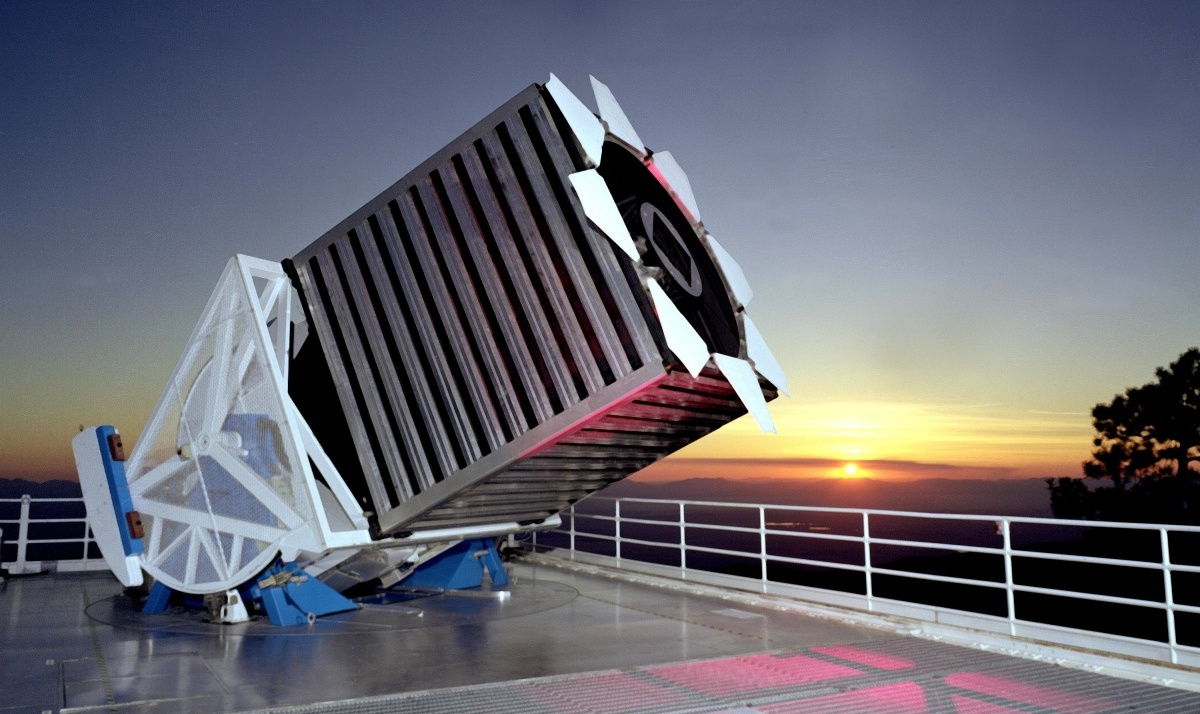

* Importando bibliotecas padrões

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Lendo arquivo CSV

In [2]:
dados = pd.read_csv('SLOAN_DR14.csv')

* Exibindo cinco primeiras linhas

In [3]:
dados.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


* Verificando posição dos objetos

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(9.491688368055556, 0.5, 'Declinação (graus)')

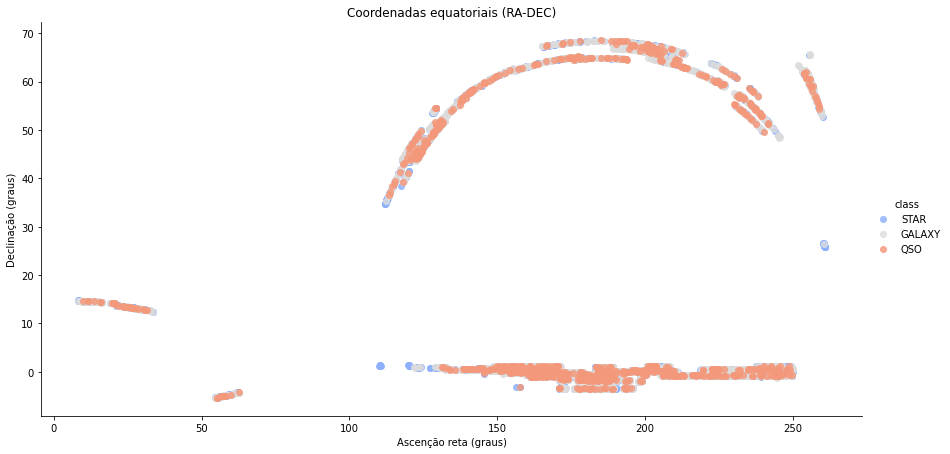

In [4]:
sns.lmplot(x='ra', y='dec', data=dados, hue='class', fit_reg=False, palette='coolwarm', size=6, aspect=2)
plt.title('Coordenadas equatoriais (RA-DEC)')
plt.xlabel('Ascenção reta (graus)')
plt.ylabel('Declinação (graus)')

* Colunas objid, rad, dec run, rerun, camcol, field, specobjid, plate, mjd e fiberid podem ser removidas. São apenas informações das observações

In [5]:
colunas_remover = ['objid','ra','dec','run','rerun','field','fiberid','mjd','plate','specobjid','camcol']

In [6]:
dados = dados.drop(colunas_remover,axis=1)

In [7]:
dados.head()

,u,g,r,i,z,class,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590


* Verificando contagem de objetos por classe

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

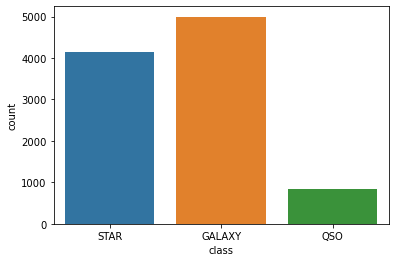

In [8]:
sns.countplot(dados['class'])

* Separando cada classe de objeto num dataset

In [9]:
estrela = dados[dados['class']=='STAR']
galaxia = dados[dados['class']=='GALAXY']
qso = dados[dados['class']=='QSO']

* Filtros

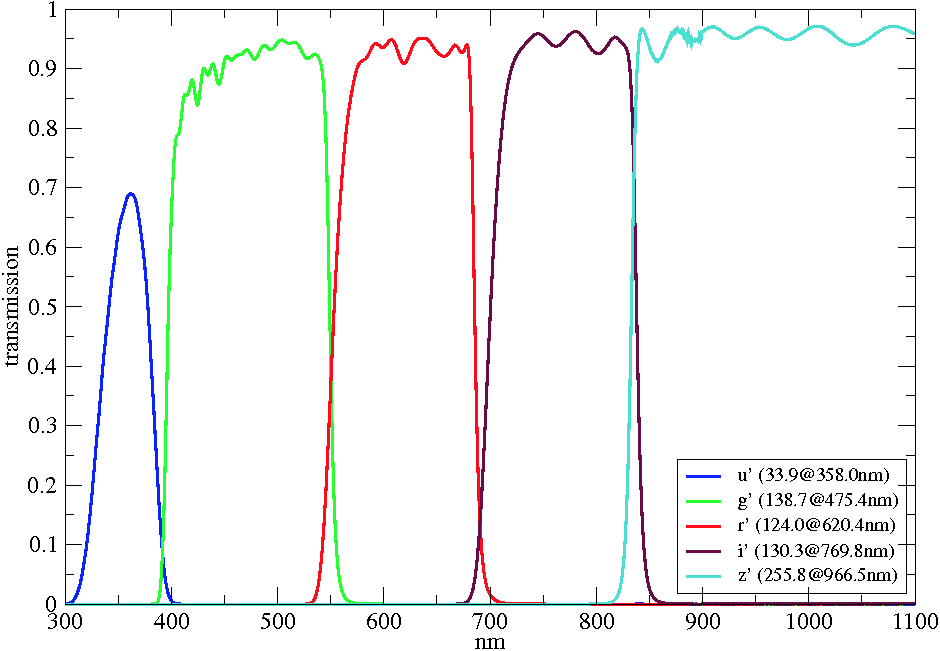

* Verificando a distribuição da magnitude na banda u (Ultravioleta)

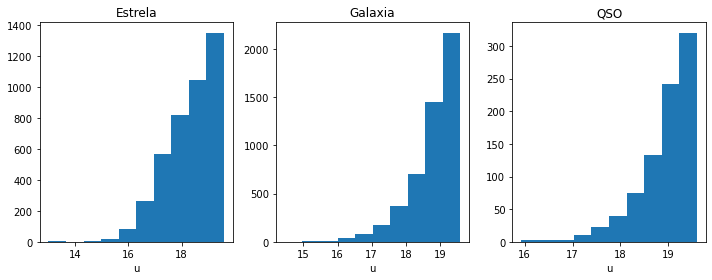

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,4))
ax1.hist(estrela['u'])
ax1.set_title('Estrela')
ax1.set_xlabel('u')
ax2.hist(galaxia['u'])
ax2.set_title('Galaxia')
ax2.set_xlabel('u')
ax3.hist(qso['u'])
ax3.set_title('QSO')
ax3.set_xlabel('u')
plt.tight_layout()

* Verificando a distribuição da magnitude na banda g (Green - Verde)

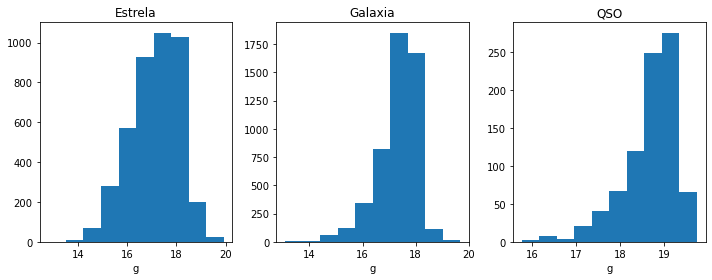

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,4))
ax1.hist(estrela['g'])
ax1.set_title('Estrela')
ax1.set_xlabel('g')
ax2.hist(galaxia['g'])
ax2.set_title('Galaxia')
ax2.set_xlabel('g')
ax3.hist(qso['g'])
ax3.set_title('QSO')
ax3.set_xlabel('g')
plt.tight_layout()

* Verificando a distribuição da magnitude na banda r - Red (Vermelho)

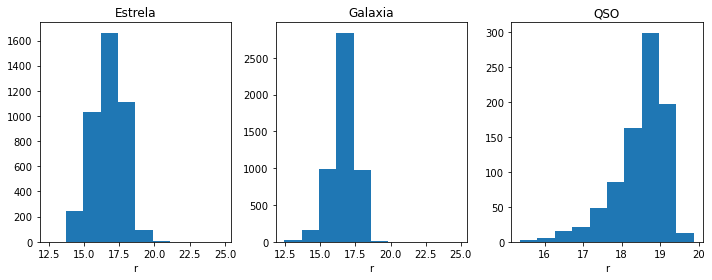

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,4))
ax1.hist(estrela['r'])
ax1.set_title('Estrela')
ax1.set_xlabel('r')
ax2.hist(galaxia['r'])
ax2.set_title('Galaxia')
ax2.set_xlabel('r')
ax3.hist(qso['r'])
ax3.set_title('QSO')
ax3.set_xlabel('r')
plt.tight_layout()

* Verificando a distribuição da magnitude na banda i (Infrared - Infravermelho)

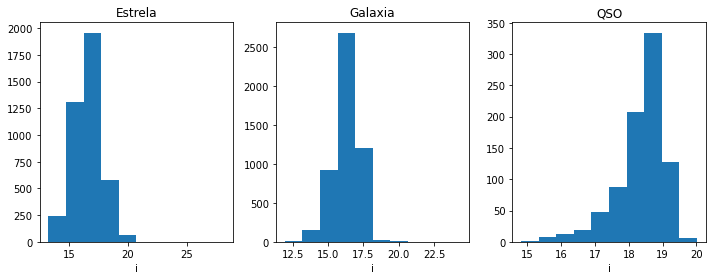

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,4))
ax1.hist(estrela['i'])
ax1.set_title('Estrela')
ax1.set_xlabel('i')
ax2.hist(galaxia['i'])
ax2.set_title('Galaxia')
ax2.set_xlabel('i')
ax3.hist(qso['i'])
ax3.set_title('QSO')
ax3.set_xlabel('i')
plt.tight_layout()

* Verificando a distribuição da magnitude na banda z - Infrared (Infravermelho)

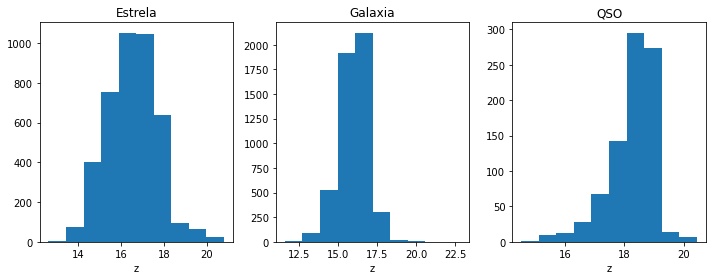

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,4))
ax1.hist(estrela['z'])
ax1.set_title('Estrela')
ax1.set_xlabel('z')
ax2.hist(galaxia['z'])
ax2.set_title('Galaxia')
ax2.set_xlabel('z')
ax3.hist(qso['z'])
ax3.set_title('QSO')
ax3.set_xlabel('z')
plt.tight_layout()

* Verifando distribuições dos redshifts (distâncias)

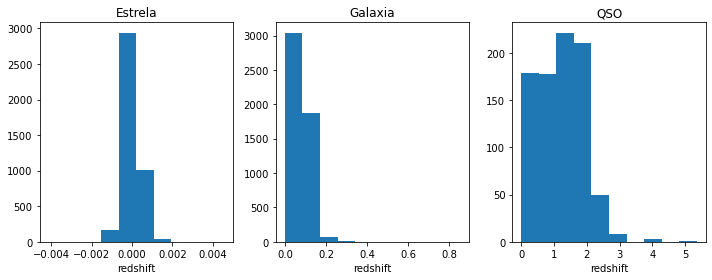

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,4))
ax1.hist(estrela['redshift'])
ax1.set_title('Estrela')
ax1.set_xlabel('redshift')
ax2.hist(galaxia['redshift'])
ax2.set_title('Galaxia')
ax2.set_xlabel('redshift')
ax3.hist(qso['redshift'])
ax3.set_title('QSO')
ax3.set_xlabel('redshift')
plt.tight_layout()

* Convertendo variável categórica classe para numérica

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
dados['class'] = le.fit_transform(dados['class'])

In [18]:
labels = le.classes_

In [19]:
labels

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

* Verificanco correlação

In [20]:
corr = dados.corr()

<AxesSubplot:>

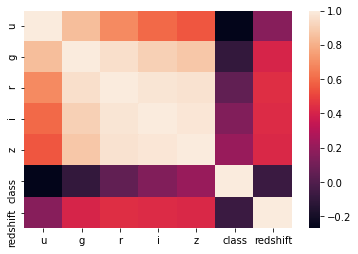

In [21]:
sns.heatmap(corr)

* Determinando variáveis X e Y

In [22]:
X = dados.drop('class',axis=1).values
Y = dados['class'].values

* Criando amostras de treino e teste

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y,test_size=0.3,random_state=42)

* Bibliotecas de métricas de classificação

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
from sklearn.metrics import confusion_matrix

* Listas para armazenar resultados dos modelos

In [29]:
modelos = []
acuracia = []
precision = []
recall = []
f1 = []

* Modelo 1: Regressão logística

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression()

In [32]:
logreg.fit(X_treino,Y_treino)

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
Y_pred_logreg = logreg.predict(X_teste)

In [34]:
cm_logreg = confusion_matrix(Y_teste,Y_pred_logreg)

<AxesSubplot:>

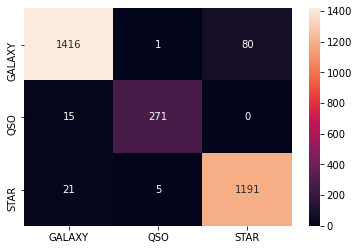

In [35]:
sns.heatmap(cm_logreg, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [36]:
acc_logreg = accuracy_score(Y_teste,Y_pred_logreg)
precision_logreg = precision_score(Y_teste,Y_pred_logreg,average='macro')
recall_logreg = recall_score(Y_teste,Y_pred_logreg,average='macro')
f1_logreg = f1_score(Y_teste,Y_pred_logreg,average='macro')

In [37]:
print("Acuracia = {:0.2f}%".format(acc_logreg*100))
print("Precisão = {:0.2f}%".format(precision_logreg*100))
print("Recall = {:0.2f}%".format(recall_logreg*100))
print("F1 = {:0.2f}%".format(f1_logreg*100))

Acuracia = 95.93%
Precisão = 96.35%
Recall = 95.74%
F1 = 96.01%


In [38]:
modelos.append("Regressão Logistica")
acuracia.append(acc_logreg*100)
precision.append(precision_logreg*100)
recall.append(recall_logreg*100)
f1.append(f1_logreg*100)

Text(0, 0.5, 'Importância')

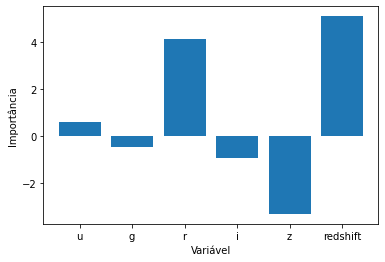

In [39]:
coefc_logreg = logreg.coef_[0]
colunas = ['u','g','r','i','z','redshift']
plt.bar(height=coefc_logreg,x=colunas)
plt.xlabel('Variável')
plt.ylabel('Importância')

* Modelo 2: KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier()

In [42]:
knn.fit(X_treino,Y_treino)

KNeighborsClassifier()

In [43]:
Y_pred_knn = knn.predict(X_teste)

In [44]:
cm_knn = confusion_matrix(Y_teste,Y_pred_knn)

<AxesSubplot:>

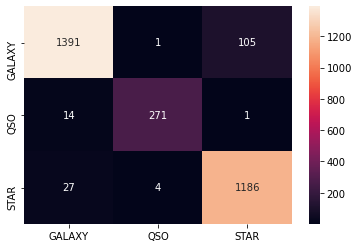

In [45]:
sns.heatmap(cm_knn, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [46]:
acc_knn = accuracy_score(Y_teste,Y_pred_knn)
precision_knn = precision_score(Y_teste,Y_pred_knn,average='macro')
recall_knn = recall_score(Y_teste,Y_pred_knn,average='macro')
f1_knn = f1_score(Y_teste,Y_pred_knn,average='macro')

In [47]:
print("Acuracia = {:0.2f}%".format(acc_knn*100))
print("Precisão = {:0.2f}%".format(precision_knn*100))
print("Recall = {:0.2f}%".format(recall_knn*100))
print("F1 = {:0.2f}%".format(f1_knn*100))

Acuracia = 94.93%
Precisão = 95.71%
Recall = 95.04%
F1 = 95.32%


In [48]:
modelos.append("KNN")
acuracia.append(acc_knn*100)
precision.append(precision_knn*100)
recall.append(recall_knn*100)
f1.append(f1_knn*100)

* Modelo 3: Máquina de vetores de suporte

In [49]:
from sklearn.svm import SVC

In [50]:
svc = SVC()

In [51]:
svc.fit(X_treino,Y_treino)

SVC()

In [52]:
Y_pred_svc = svc.predict(X_teste)

In [53]:
cm_svc = confusion_matrix(Y_teste,Y_pred_svc)

<AxesSubplot:>

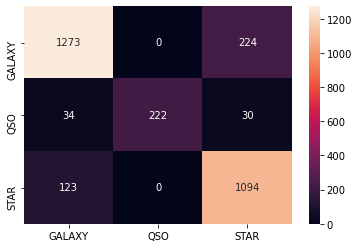

In [54]:
sns.heatmap(cm_svc, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [55]:
acc_svc = accuracy_score(Y_teste,Y_pred_svc)
precision_svc = precision_score(Y_teste,Y_pred_svc,average='macro')
recall_svc = recall_score(Y_teste,Y_pred_svc,average='macro')
f1_svc = f1_score(Y_teste,Y_pred_svc,average='macro')

In [56]:
print("Acuracia = {:0.2f}%".format(acc_svc*100))
print("Precisão = {:0.2f}%".format(precision_svc*100))
print("Recall = {:0.2f}%".format(recall_svc*100))
print("F1 = {:0.2f}%".format(f1_svc*100))

Acuracia = 86.30%
Precisão = 90.06%
Recall = 84.18%
F1 = 86.56%


In [57]:
modelos.append("SVC")
acuracia.append(acc_svc*100)
precision.append(precision_svc*100)
recall.append(recall_svc*100)
f1.append(f1_svc*100)

* Modelo 4: Árvore de Decisão

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dte = DecisionTreeClassifier()

In [60]:
dte.fit(X_treino,Y_treino)

DecisionTreeClassifier()

In [61]:
Y_pred_dte = dte.predict(X_teste)

In [62]:
cm_dte = confusion_matrix(Y_teste,Y_pred_dte)

<AxesSubplot:>

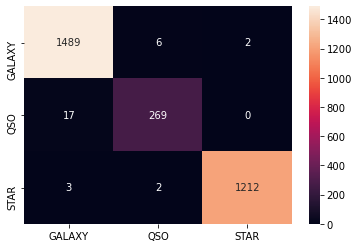

In [63]:
sns.heatmap(cm_dte, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [64]:
acc_dtc = accuracy_score(Y_teste,Y_pred_dte)
precision_dtc = precision_score(Y_teste,Y_pred_dte,average='macro')
recall_dtc = recall_score(Y_teste,Y_pred_dte,average='macro')
f1_dtc = f1_score(Y_teste,Y_pred_dte,average='macro')

In [65]:
print("Acuracia = {:0.2f}%".format(acc_dtc*100))
print("Precisão = {:0.2f}%".format(precision_dtc*100))
print("Recall = {:0.2f}%".format(recall_dtc*100))
print("F1 = {:0.2f}%".format(f1_dtc*100))

Acuracia = 99.00%
Precisão = 98.54%
Recall = 97.70%
F1 = 98.11%


In [66]:
modelos.append("Arvore Decisão")
acuracia.append(acc_dtc*100)
precision.append(precision_dtc*100)
recall.append(recall_dtc*100)
f1.append(f1_dtc*100)

Text(0, 0.5, 'Importância')

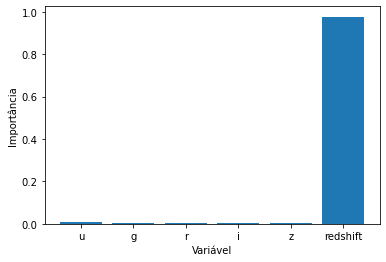

In [67]:
coefc_dte = dte.feature_importances_
colunas = ['u','g','r','i','z','redshift']
plt.bar(height=coefc_dte,x=colunas)
plt.xlabel('Variável')
plt.ylabel('Importância')

* Modelo 5: Floresta aleatória

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier()

In [70]:
rfc.fit(X_treino,Y_treino)

RandomForestClassifier()

In [71]:
Y_pred_rfc = dte.predict(X_teste)

In [72]:
cm_rfc = confusion_matrix(Y_teste,Y_pred_rfc)

<AxesSubplot:>

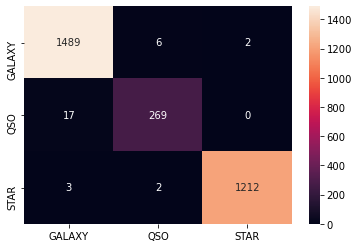

In [73]:
sns.heatmap(cm_rfc, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [74]:
acc_rfc = accuracy_score(Y_teste,Y_pred_rfc)
precision_rfc = precision_score(Y_teste,Y_pred_rfc,average='macro')
recall_rfc = recall_score(Y_teste,Y_pred_rfc,average='macro')
f1_rfc = f1_score(Y_teste,Y_pred_rfc,average='macro')

In [75]:
print("Acuracia = {:0.2f}%".format(acc_rfc*100))
print("Precisão = {:0.2f}%".format(precision_rfc*100))
print("Recall = {:0.2f}%".format(recall_rfc*100))
print("F1 = {:0.2f}%".format(f1_rfc*100))

Acuracia = 99.00%
Precisão = 98.54%
Recall = 97.70%
F1 = 98.11%


In [76]:
modelos.append("Floresta Aleatória")
acuracia.append(acc_rfc*100)
precision.append(precision_rfc*100)
recall.append(recall_rfc*100)
f1.append(f1_rfc*100)

* Modelo 6: Ada Boost

In [77]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
ada = AdaBoostClassifier()

In [79]:
ada.fit(X_treino,Y_treino)

AdaBoostClassifier()

In [80]:
Y_pred_ada = ada.predict(X_teste)

In [81]:
cm_ada = confusion_matrix(Y_teste,Y_pred_ada)

<AxesSubplot:>

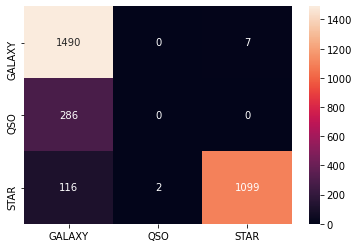

In [82]:
sns.heatmap(cm_ada, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [83]:
acc_ada = accuracy_score(Y_teste,Y_pred_ada)
precision_ada = precision_score(Y_teste,Y_pred_ada,average='macro')
recall_ada = recall_score(Y_teste,Y_pred_ada,average='macro')
f1_ada = f1_score(Y_teste,Y_pred_ada,average='macro')

In [84]:
print("Acuracia = {:0.2f}%".format(acc_ada*100))
print("Precisão = {:0.2f}%".format(precision_ada*100))
print("Recall = {:0.2f}%".format(recall_ada*100))
print("F1 = {:0.2f}%".format(f1_ada*100))

Acuracia = 86.30%
Precisão = 59.37%
Recall = 63.28%
F1 = 60.85%


In [85]:
modelos.append("Ada Boost")
acuracia.append(acc_ada*100)
precision.append(precision_ada*100)
recall.append(recall_ada*100)
f1.append(f1_ada*100)

Text(0, 0.5, 'Importância')

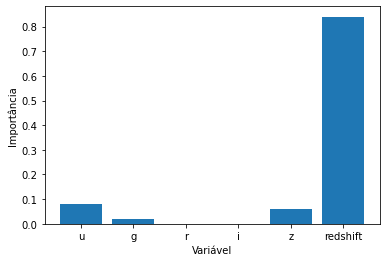

In [86]:
coefc_ada = ada.feature_importances_
colunas = ['u','g','r','i','z','redshift']
plt.bar(height=coefc_ada,x=colunas)
plt.xlabel('Variável')
plt.ylabel('Importância')

* Modelo 7: Naive-Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
nb = GaussianNB()

In [89]:
nb.fit(X_treino,Y_treino)

GaussianNB()

In [90]:
Y_pred_nb = nb.predict(X_teste)

In [91]:
cm_nb = confusion_matrix(Y_teste,Y_pred_nb)

<AxesSubplot:>

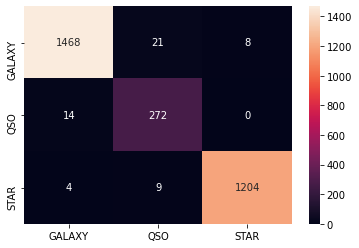

In [92]:
sns.heatmap(cm_nb, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [93]:
acc_nb = accuracy_score(Y_teste,Y_pred_nb)
precision_nb = precision_score(Y_teste,Y_pred_nb,average='macro')
recall_nb = recall_score(Y_teste,Y_pred_nb,average='macro')
f1_nb = f1_score(Y_teste,Y_pred_nb,average='macro')

In [94]:
print("Acuracia = {:0.2f}%".format(acc_nb*100))
print("Precisão = {:0.2f}%".format(precision_nb*100))
print("Recall = {:0.2f}%".format(recall_nb*100))
print("F1 = {:0.2f}%".format(f1_nb*100))

Acuracia = 98.13%
Precisão = 96.06%
Recall = 97.37%
F1 = 96.69%


In [95]:
modelos.append("Naive-Bayes")
acuracia.append(acc_nb*100)
precision.append(precision_nb*100)
recall.append(recall_nb*100)
f1.append(f1_nb*100)

* Criando DataFrame com desempenho dos modelos

In [96]:
dici = {"Modelo" : modelos, "Acuracia" : acuracia, "Precisão" : precision,
       "Recall" : recall, "F1" : f1}

In [97]:
pd_dici = pd.DataFrame(dici)

In [98]:
pd_dici

,Modelo,Acuracia,Precisão,Recall,F1
0,Regressão Logistica,95.933333,96.353447,95.736007,96.014028
1,KNN,94.933333,95.706981,95.042390,95.320720
2,SVC,86.300000,90.059416,84.184099,86.562326
3,Arvore Decisão,99.000000,98.540596,97.703565,98.113362
4,Floresta Aleatória,99.000000,98.540596,97.703565,98.113362
5,Ada Boost,86.300000,59.373244,63.278808,60.850190
6,Naive-Bayes,98.133333,96.064951,97.366496,96.692286


* Ordenando em ordem crescente usando Recall

In [99]:
pd_dici = pd_dici.sort_values('Recall',ascending=False)

In [100]:
pd_dici

,Modelo,Acuracia,Precisão,Recall,F1
3,Arvore Decisão,99.000000,98.540596,97.703565,98.113362
4,Floresta Aleatória,99.000000,98.540596,97.703565,98.113362
6,Naive-Bayes,98.133333,96.064951,97.366496,96.692286
0,Regressão Logistica,95.933333,96.353447,95.736007,96.014028
1,KNN,94.933333,95.706981,95.042390,95.320720
2,SVC,86.300000,90.059416,84.184099,86.562326
5,Ada Boost,86.300000,59.373244,63.278808,60.850190


* Árvore de decisão e floresta aleatória apresentaram o mesmo desempenho